In [1]:
from hao.ViT import ViT
from data_ISIC import ISICDataModule
import hao.utils as u
from d2l import torch as d2l

In [2]:
img_size, patch_size, batch_size = 16, 8, 128
num_workers = 4
num_classes = 10
max_epochs = 20
num_gpus = 1
use_bias = False
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 128, 512, 4, 2
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.1
last_model_path = r'model_pth/last_model.pth'
best_model_path = r'model_pth/best_model.pth'

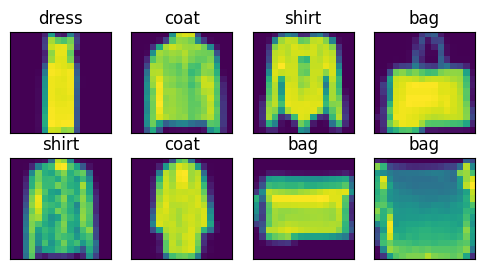

In [3]:
data = d2l.FashionMNIST(batch_size, resize=(img_size, img_size))
train_loader = data.get_dataloader(train=True)
test_loader = data.get_dataloader(train=False)

batch = next(iter(train_loader))
data.visualize(batch, nrows=2, ncols=4)

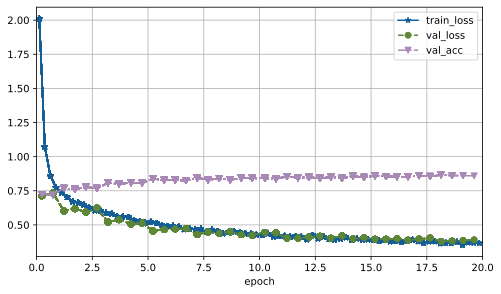

In [4]:
model = ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, lr, use_bias, num_classes)
trainer = u.Trainer(max_epochs, num_gpus, last_model_path, best_model_path)
trainer.fit(model, data)

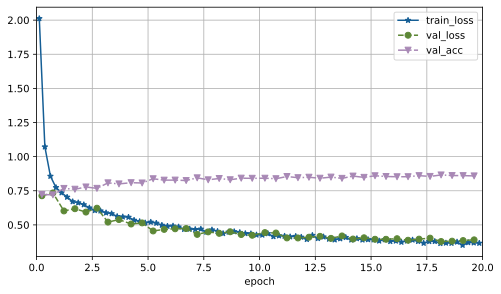

In [5]:
model.board.draw_his()

In [7]:
trainer.print_training_his(20)

Epoch 1 : train loss 1.1777  val loss -- 0.7194 Acc 72.33%
Epoch 2 : train loss 0.6928  val loss -- 0.6105 Acc 76.46%
Epoch 3 : train loss 0.6195  val loss -- 0.6047 Acc 77.28%
Epoch 4 : train loss 0.5734  val loss -- 0.5272 Acc 80.43%
Epoch 5 : train loss 0.5328  val loss -- 0.5064 Acc 80.97%
Epoch 6 : train loss 0.5054  val loss -- 0.4619 Acc 83.28%
Epoch 7 : train loss 0.4793  val loss -- 0.4716 Acc 82.73%
Epoch 8 : train loss 0.4620  val loss -- 0.4391 Acc 83.73%
Epoch 9 : train loss 0.4472  val loss -- 0.4438 Acc 83.58%
Epoch 10: train loss 0.4366  val loss -- 0.4257 Acc 84.12%
Epoch 11: train loss 0.4246  val loss -- 0.4411 Acc 84.14%
Epoch 12: train loss 0.4142  val loss -- 0.4030 Acc 85.01%
Epoch 13: train loss 0.4082  val loss -- 0.4103 Acc 84.57%
Epoch 14: train loss 0.3990  val loss -- 0.4108 Acc 84.65%
Epoch 15: train loss 0.3931  val loss -- 0.4008 Acc 85.22%
Epoch 16: train loss 0.3869  val loss -- 0.3940 Acc 85.75%
Epoch 17: train loss 0.3818  val loss -- 0.3926 Acc 85.2